# Shap implementation

In [1]:
import numpy as np
import shap
import os
import numpy as np
from PIL import Image
import tensorflow as tf  # Assuming `model` is a TensorFlow/Keras model
from sklearn.metrics import classification_report
from collections import Counter

# begin_path = 'C:/Users/jonpg/OneDrive/Documents/School/CS 770/covid_data/'
begin_path = 'C:/Users/Jon/Documents/School/CS 770/covid_data/'

c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def pre_process(image_path):
    image_path = begin_path + image_path
    original_image = Image.open(image_path)
    preprocessed_image = original_image.resize((256, 256))
    preprocessed_image = np.array(preprocessed_image) / 255.0
    return np.expand_dims(preprocessed_image, axis = 0)


In [3]:
def run_explainer(image, model_type=1):
    if model_type == 0:
        label = 'CNN'
        model_path = 'covid_classifier_v2 - best'
    elif model_type == 1:
        label = 'RESNET'
        model_path = 'covid_resnet_classifier_v2'
    elif model_type == 2:
        label='CNN + RESNET'
        model_path = 'covid_combined_classifier_v2'
    else:
        print('Need an actually integer (0,1,2) for model')
    class_names = [f'{label}-covid', f'{label}-normal']

    # Load your model (ensure you have it defined or loaded elsewhere)
    # combined_model = tf.keras.models.load_model(begin_path + 'covid_resnet_classifier_v2.h5')  # Update with actual model path
    model = tf.keras.models.load_model(begin_path + f'{model_path}.h5')  # Update with actual model path
    # define a masker that is used to mask out partitions of the input image.
    # python function to get model output; replace this function with your own model function.
    def f(preprocessed_image):
        # print(inputs.shape)
        # inputs = inputs.transpose(0,3,1,2)
        # inputs = torch.Tensor(inputs)
        # with torch.no_grad():
        #     logits = model(inputs).logits
        # print(logits)

        preds = model.predict(preprocessed_image)

        return preds
    masker = shap.maskers.Image("blur(128,128)", image.shape[1:])

    # create an explainer with model and image masker
    explainer = shap.Explainer(f, masker, output_names=class_names)

    # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
    shap_values12500 = explainer(image, max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
    shap.image_plot(shap_values12500)

2/2 [==============================] - 0s 159ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

2/2 [==============================] - 0s 163ms/step


 54%|█████▍    | 542/998 [00:00<00:00, 927.90it/s]

2/2 [==============================] - 0s 151ms/step


 64%|██████▍   | 642/998 [00:01<00:01, 307.73it/s]

2/2 [==============================] - 0s 160ms/step


 69%|██████▉   | 692/998 [00:02<00:01, 230.19it/s]

2/2 [==============================] - 0s 159ms/step


 74%|███████▍  | 742/998 [00:02<00:01, 180.50it/s]

2/2 [==============================] - 0s 159ms/step


 79%|███████▉  | 792/998 [00:03<00:01, 150.23it/s]

2/2 [==============================] - 0s 161ms/step


 84%|████████▍ | 842/998 [00:04<00:01, 130.40it/s]

2/2 [==============================] - 0s 160ms/step


 89%|████████▉ | 892/998 [00:04<00:00, 115.68it/s]

2/2 [==============================] - 0s 161ms/step


 94%|█████████▍| 942/998 [00:05<00:00, 106.38it/s]

2/2 [==============================] - 0s 163ms/step


 99%|█████████▉| 992/998 [00:05<00:00, 99.96it/s] 

2/2 [==============================] - 0s 157ms/step


1042it [00:06, 95.80it/s]                        

1/1 [==============================] - 0s 75ms/step


PartitionExplainer explainer: 2it [00:12, 12.04s/it]               


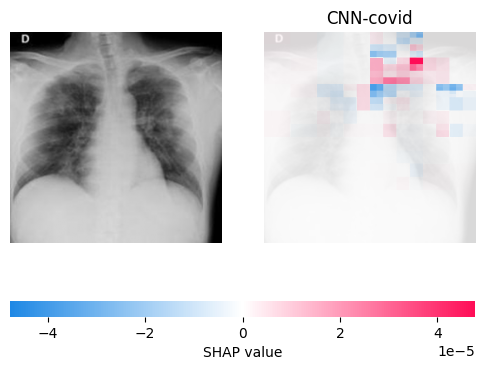

2/2 [==============================] - 1s 413ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

2/2 [==============================] - 1s 407ms/step


 34%|███▍      | 342/998 [00:01<00:02, 276.90it/s]

2/2 [==============================] - 1s 401ms/step


 39%|███▉      | 392/998 [00:02<00:04, 137.84it/s]

2/2 [==============================] - 1s 406ms/step


 44%|████▍     | 442/998 [00:03<00:05, 93.35it/s] 

2/2 [==============================] - 1s 405ms/step


 49%|████▉     | 492/998 [00:04<00:07, 72.21it/s]

2/2 [==============================] - 1s 414ms/step


 54%|█████▍    | 542/998 [00:06<00:07, 60.41it/s]

2/2 [==============================] - 1s 411ms/step


 59%|█████▉    | 592/998 [00:07<00:07, 53.52it/s]

2/2 [==============================] - 1s 396ms/step


 64%|██████▍   | 642/998 [00:08<00:07, 49.42it/s]

2/2 [==============================] - 1s 407ms/step


 69%|██████▉   | 692/998 [00:09<00:06, 46.29it/s]

2/2 [==============================] - 1s 402ms/step


 74%|███████▍  | 742/998 [00:11<00:05, 44.45it/s]

2/2 [==============================] - 1s 400ms/step


 79%|███████▉  | 792/998 [00:12<00:04, 43.13it/s]

2/2 [==============================] - 1s 411ms/step


 84%|████████▍ | 842/998 [00:13<00:03, 42.04it/s]

2/2 [==============================] - 1s 414ms/step


 89%|████████▉ | 892/998 [00:14<00:02, 41.41it/s]

2/2 [==============================] - 1s 403ms/step


 94%|█████████▍| 942/998 [00:16<00:01, 41.06it/s]

2/2 [==============================] - 1s 402ms/step


 99%|█████████▉| 992/998 [00:17<00:00, 40.84it/s]

2/2 [==============================] - 1s 406ms/step


1042it [00:18, 40.61it/s]                        

1/1 [==============================] - 0s 200ms/step


PartitionExplainer explainer: 2it [00:25, 25.82s/it]               


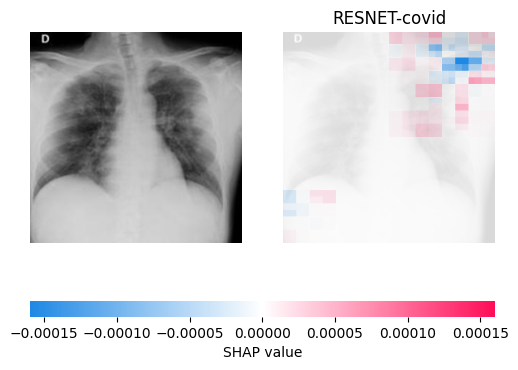

2/2 [==============================] - 1s 312ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

2/2 [==============================] - 1s 305ms/step


 34%|███▍      | 342/998 [00:00<00:01, 343.01it/s]

2/2 [==============================] - 1s 312ms/step


 39%|███▉      | 392/998 [00:01<00:03, 171.13it/s]

2/2 [==============================] - 1s 313ms/step


 44%|████▍     | 442/998 [00:02<00:04, 115.82it/s]

2/2 [==============================] - 1s 309ms/step


 49%|████▉     | 492/998 [00:03<00:05, 90.34it/s] 

2/2 [==============================] - 1s 312ms/step


 54%|█████▍    | 542/998 [00:04<00:06, 75.96it/s]

2/2 [==============================] - 1s 312ms/step


 59%|█████▉    | 592/998 [00:05<00:06, 67.10it/s]

2/2 [==============================] - 1s 315ms/step


 64%|██████▍   | 642/998 [00:06<00:05, 61.37it/s]

2/2 [==============================] - 1s 322ms/step


 69%|██████▉   | 692/998 [00:07<00:05, 57.56it/s]

2/2 [==============================] - 1s 325ms/step


 74%|███████▍  | 742/998 [00:08<00:04, 55.05it/s]

2/2 [==============================] - 1s 306ms/step


 79%|███████▉  | 792/998 [00:09<00:03, 53.53it/s]

2/2 [==============================] - 1s 313ms/step


 84%|████████▍ | 842/998 [00:10<00:02, 52.70it/s]

2/2 [==============================] - 1s 317ms/step


 89%|████████▉ | 892/998 [00:11<00:02, 51.64it/s]

2/2 [==============================] - 1s 306ms/step


 94%|█████████▍| 942/998 [00:12<00:01, 51.27it/s]

2/2 [==============================] - 1s 318ms/step


 99%|█████████▉| 992/998 [00:13<00:00, 50.81it/s]

2/2 [==============================] - 1s 311ms/step


1042it [00:14, 50.79it/s]                        

1/1 [==============================] - 0s 136ms/step


PartitionExplainer explainer: 2it [00:20, 20.99s/it]               


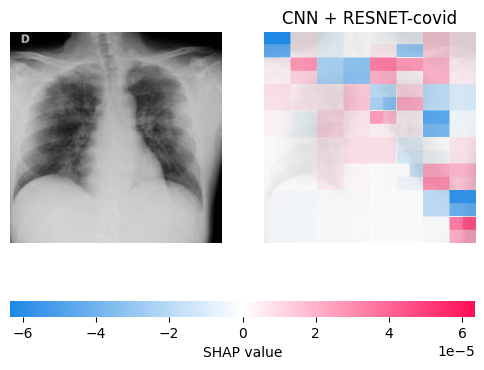

In [10]:
image = pre_process('test/covid/COVID-888.jpg')

for i in range(3):
    # print(i)
    run_explainer(image, i)

In [ ]:
combined = shap_values12345 + shap_values12500

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


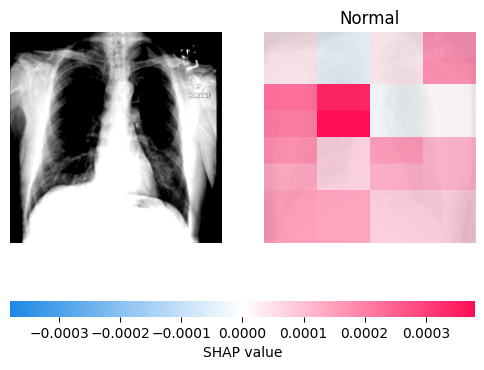

In [ ]:
shap.image_plot(combined)

## Combine Shapley Values

In [ ]:
import numpy as np
import shap

In [ ]:
from datasets import load_dataset

dataset = load_dataset('imagefolder', data_dir='jpeg')

In [ ]:

class_names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [ ]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained("covid_radiology_classification")

In [ ]:
# python function to get model output; replace this function with your own model function.
import tensorflow as tf
def f(inputs):
    # print(inputs.shape)
    inputs = inputs.transpose(0,3,1,2)
    inputs = torch.Tensor(inputs)
    with torch.no_grad():
        logits = model(inputs).logits
    # print(logits)
    return logits.numpy()

In [ ]:
from transformers import AutoImageProcessor
import torch

image_processor = AutoImageProcessor.from_pretrained("covid_radiology_classification")


(1, 224, 224, 3)

In [ ]:
test_set = dataset['train']
start_index = 10000
iterations = 10
predictions = []
all_values = None

for i in range(start_index, start_index + iterations):
    image = test_set[i]['image']
    inputs = image_processor(image, return_tensors="pt")
    x_test = inputs['pixel_values'].numpy()
    x_trans = x_test.transpose(0,2,3,1)

    # define a masker that is used to mask out partitions of the input image.
    masker = shap.maskers.Image("blur(128,128)", x_trans[0].shape)

    # create an explainer with model and image masker
    explainer = shap.Explainer(f, masker, output_names=class_names)

    # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
    shap_values = explainer(x_trans, max_evals=2000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
    predictions.append(shap_values.output_names)
    if all_values == None:
        all_values = shap_values
    else:
        all_values += shap_values


PartitionExplainer explainer: 2it [10:05, 605.85s/it]              
PartitionExplainer explainer: 2it [09:49, 589.45s/it]              
PartitionExplainer explainer: 2it [09:56, 596.04s/it]              
PartitionExplainer explainer: 2it [09:38, 578.12s/it]              
PartitionExplainer explainer: 2it [09:38, 578.22s/it]              
PartitionExplainer explainer: 2it [09:39, 579.76s/it]              
PartitionExplainer explainer: 2it [09:39, 579.31s/it]              
PartitionExplainer explainer: 2it [09:36, 576.60s/it]              
PartitionExplainer explainer: 2it [09:38, 578.73s/it]              
PartitionExplainer explainer: 2it [09:39, 579.11s/it]              


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


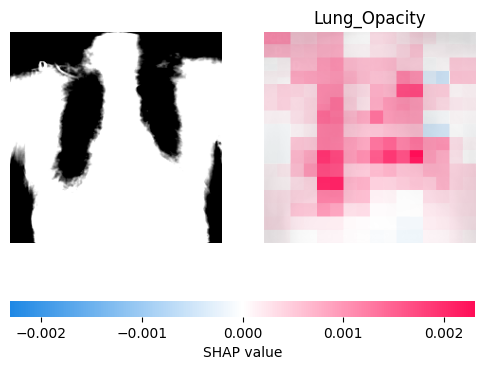

In [ ]:
#Covid part 1
shap.image_plot(all_values)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


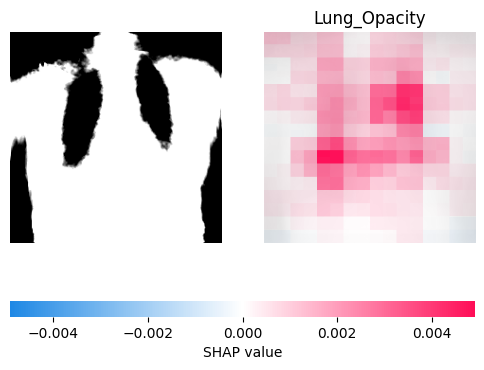

In [ ]:
#Covid part 2
shap.image_plot(all_values)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


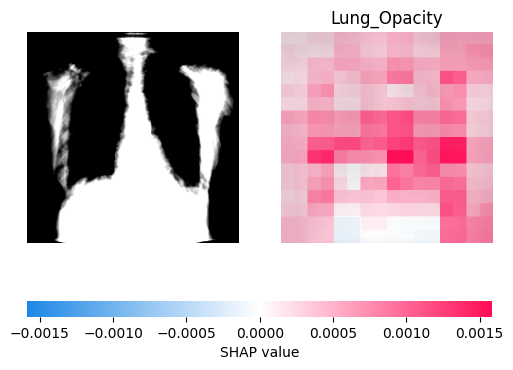

In [ ]:
#Normal part 1
shap.image_plot(all_values)

In [ ]:
predictions

[['Lung_Opacity'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal']]